Color change is basically removing the prominent color from an image and then apply it to some other image.Images are mostly in RGB format but Erik Reinhard introduced an format which eases the alteration.The method basically involves subtracting the mean values of target from each component multipying it by the standard ratio and then adding mean value of source in the target image.
If you want to learn more about color transfer algorithm here is paper link:"https://www.cs.tau.ac.il/~turkel/imagepapers/ColorTransfer.pdf"
Thanks to Adrian Rosenbrock of pyimagesearch,the program is refrenced from the blog "https://www.pyimagesearch.com/2014/06/30/super-fast-color-transfer-images/"

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 #for Image Processing

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['source.jpeg', 'target.jpeg']


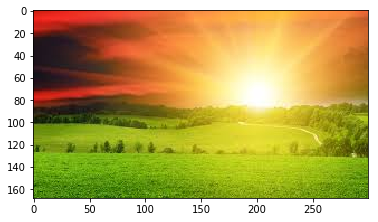

SOURCE


In [2]:
source=cv2.imread("../input/source.jpeg")
# An image is read by opencv in BGR(blue-green-red) format to change in it original format cvtcolor function is used.
source=cv2.cvtColor(source,cv2.COLOR_BGR2RGB)
plt.imshow(source)
plt.show()
print("SOURCE")

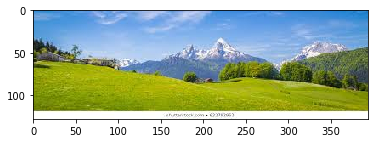

TARGET


In [3]:
target=cv2.imread("../input/target.jpeg")
target=cv2.cvtColor(target,cv2.COLOR_BGR2RGB)
plt.imshow(target)
plt.show()
print("TARGET")

In [4]:
# L* for the lightness and a* and b* for the green–red and blue–yellow color components	
source_lab=cv2.cvtColor(source,cv2.COLOR_BGR2LAB).astype("float32")
target_lab=cv2.cvtColor(target,cv2.COLOR_BGR2LAB).astype("float32")

In [5]:
# Finding the mean and standard deviation for each lightness ,green-red and blue-yellow components for source image
(l,a,b)=cv2.split(source_lab)
(lmeans,lstds)=(l.mean(),l.std())
(ameans,astds)=(a.mean(),a.std())
(bmeans,bstds)=(b.mean(),b.std())


In [6]:
(l,a,b)=cv2.split(target_lab)
(lmeant,lstdt)=(l.mean(),l.std())
(ameant,astdt)=(a.mean(),a.std())
(bmeant,bstdt)=(b.mean(),b.std())

In [7]:
# split function divides image in three value
(l,a,b)=cv2.split(target_lab)	
# Subtracting mean of targetfrom target
l-=lmeant
a-=ameant
b-=bmeant 

In [8]:
# Dividing by standard ratio
l=(lstdt/lstds)*l
a=(astdt/astds)*a
b=(bstdt/bstds)*b

In [9]:
# Adding mean of src to target image to change its color
l+=lmeans
a+=ameans
b+=bmeans

In [10]:
# to make values between 0,255
l=np.clip(l,0,255)
a=np.clip(a,0,255)
b=np.clip(b,0,255)

In [11]:
transfer=cv2.merge([l,a,b])
transfer=cv2.cvtColor(transfer.astype("uint8"),cv2.COLOR_LAB2BGR)

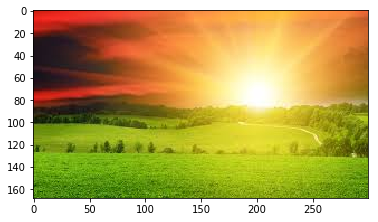

SOURCE


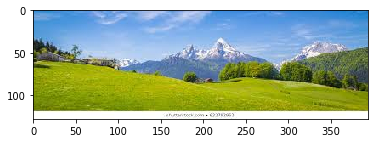

TARGET


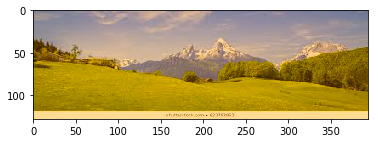

CHANGED COLOR


In [12]:
plt.imshow(source)
plt.show()
print("SOURCE")
plt.imshow(target)
plt.show()
print("TARGET")
plt.imshow(transfer)
plt.show()
print("CHANGED COLOR")